num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
 train_data[0]


In [ ]:
train_labels[0]

1

 Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

vectorize your labels

In [ ]:
y_train[0]

1.0

In [ ]:
y_test[0]

0.0

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(32, activation="tanh"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
 loss="mse",
 metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 64ms/step - loss: 1.9599e-07 - accuracy: 1.0000 - val_loss: 0.1096 - val_accuracy: 0.8779
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 1.9306e-07 - accuracy: 1.0000 - val_loss: 0.1096 - val_accuracy: 0.8777
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 1.9074e-07 - accuracy: 1.0000 - val_loss: 0.1097 - val_accuracy: 0.8779
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 1.8884e-07 - accuracy: 1.0000 - val_loss: 0.1097 - val_accuracy: 0.8780
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 1.8729e-07 - accuracy: 1.0000 - val_loss: 0.1097 - val_accuracy: 0.8776
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 1.8602e-07 - accuracy: 1.0000 - val_loss: 0.1098 - val_accuracy: 0.8776
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 1.8496e-07 - accuracy: 1.0000 - val_loss: 0.1098 - val_ac

In [ ]:
 history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

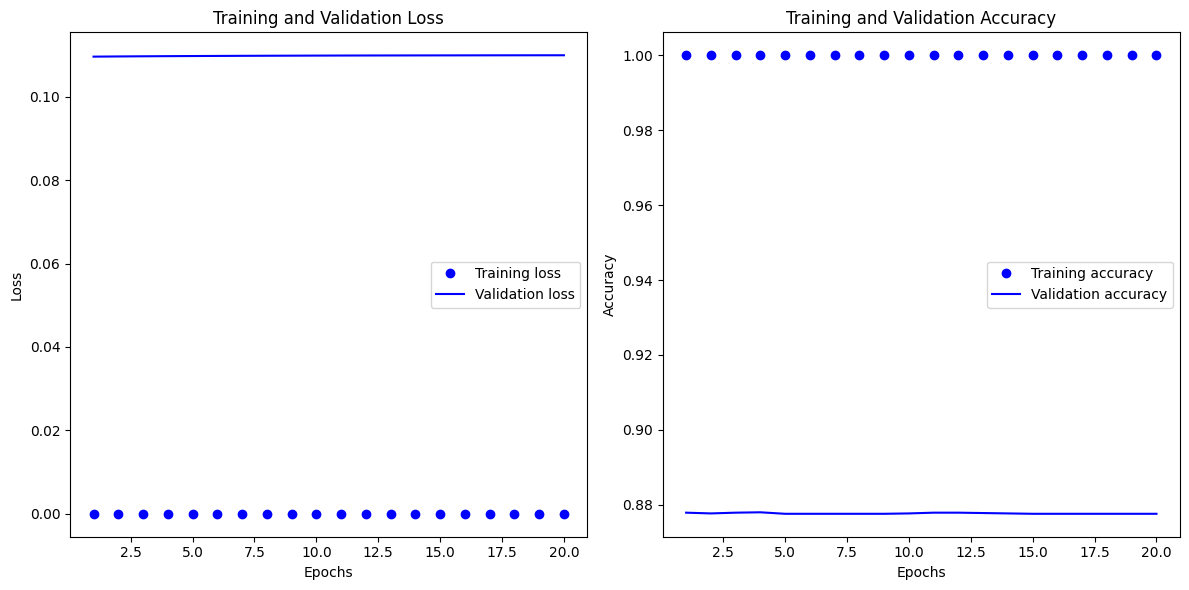

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
acc = history.history['accuracy']  # Change 'accuracy' to the appropriate metric if needed
val_acc = history.history['val_accuracy']  # Change 'val_accuracy' to the appropriate metric if needed

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


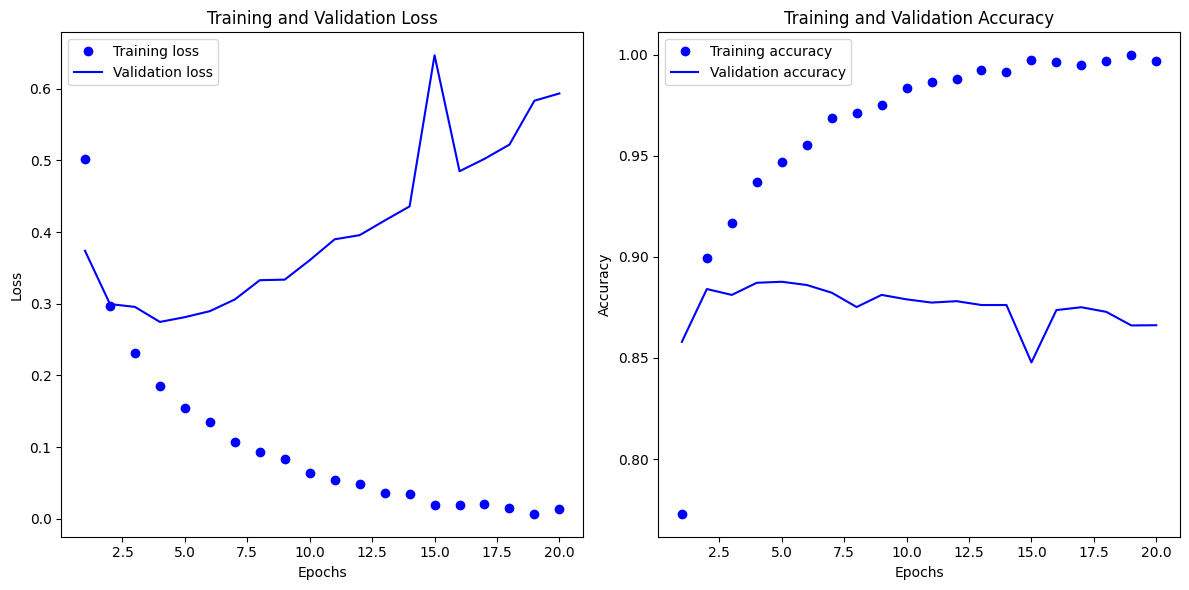

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
acc = history.history['accuracy']  # Change 'accuracy' to the appropriate metric if needed
val_acc = history.history['val_accuracy']  # Change 'val_accuracy' to the appropriate metric if needed

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


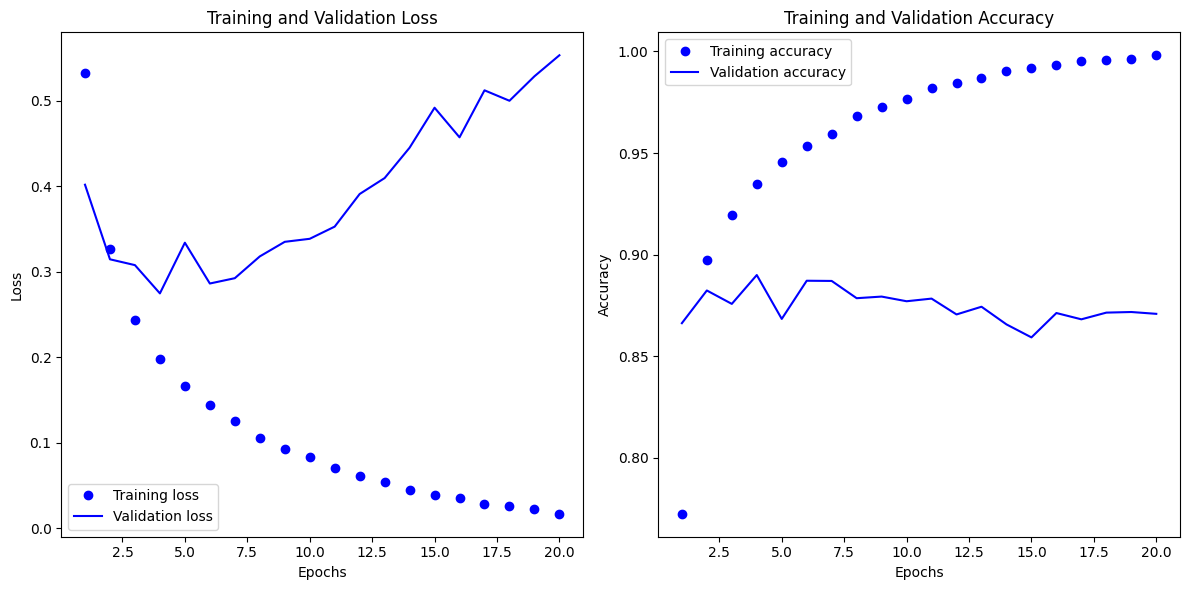

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
acc = history.history['accuracy']  # Change 'accuracy' to the appropriate metric if needed
val_acc = history.history['val_accuracy']  # Change 'val_accuracy' to the appropriate metric if needed

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2032 - accuracy: 0.9460
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1372 - accuracy: 0.9584
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1108 - accuracy: 0.9662
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.4608 - accuracy: 0.8565


In [ ]:
results

[0.4608267545700073, 0.8565199971199036]

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.01908732],
       [0.99997556],
       [0.22745956],
       ...,
       [0.02229381],
       [0.01524179],
       [0.91096455]], dtype=float32)